In [1]:
import sys
# !{sys.executable} -m pip install 'streamlit'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import math

In [4]:
DataDir = "../CSV_data_files/" 

HHdata = pd.read_csv(DataDir+"faps_household_puf.csv")
HHdata.columns = HHdata.columns.str.strip().str.lower().str.replace(' ', '_',regex=True).str.replace('(', '',regex=True).str.replace(')', '',regex=True)

INdata = pd.read_csv(DataDir+"faps_individual_puf.csv")
INdata.columns = INdata.columns.str.strip().str.lower().str.replace(' ', '_',regex=True).str.replace('(', '',regex=True).str.replace(')', '',regex=True)

HHINdata = HHdata.merge(INdata,how='inner',left_on='hhnum',right_on='hhnum')

print("Number of variables in HHdata: ", len(HHdata.keys()))
print("Number of variables in INdata: ", len(INdata.keys()))
print("Number of variables in HHINdata: ", len(HHINdata.keys()))

print("Number of observations in HHdata: ", len(HHdata))
print("Number of observations in INdata: ", len(INdata))
print("Number of observations in HHINdata: ", len(HHINdata))

Number of variables in HHdata:  279
Number of variables in INdata:  77
Number of variables in HHINdata:  355
Number of observations in HHdata:  4826
Number of observations in INdata:  14317
Number of observations in HHINdata:  14317


/var/folders/_g/519tvcx524j765g2f3_01vbc0000gn/T/ipykernel_5635/998581035.py:6: DtypeWarning: Columns (9,11,54) have mixed types. Specify dtype option on import or set low_memory=False.
  INdata = pd.read_csv(DataDir+"faps_individual_puf.csv")


In [48]:
print("HHINdata keys:")
# for i,key in enumerate(HHINdata.keys()):
#     print("\t", key)

HHINdata keys:


-30.0 183.07


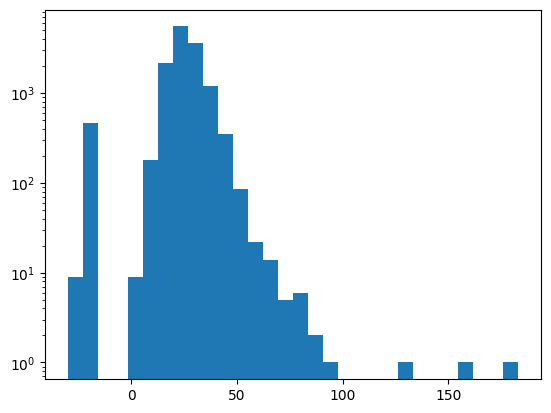

In [5]:
HHINdata['bmi'] = HHINdata['bmi'].replace({'V':'-20', 'E':'-30'})

HHINdata['bmi'] = HHINdata['bmi'].astype('float')

print(min(HHINdata['bmi']),max(HHINdata['bmi']))

plt.hist(HHINdata['bmi'],bins=30)
plt.yscale("log")
plt.show()

In [29]:
#bins should be automated and create default value
#range should be automated and create default value
#DONE - Remove negative values from demographic variables (question skipped, N/A, etc.) 
def overlayDemHistPlotter(data,demos,targets):
    color = ["blue","red","green","orange","pink","dimgray","blueviolet","magenta"]
    for i,target in enumerate(targets):
        targetBins = int((data[target].max()-data[target].min())/math.sqrt(len(data[target])))
        for i, demo in enumerate(demos):
            for j, cat in enumerate(np.sort(data[demo][data[demo]>0].unique())):
                y,x,_ = plt.hist(data[target][data[target]>0][data[demo]==cat],label=f'{demo}:{cat}',
                         range=[data[target].min(),data[target].max()/3], 
                         histtype="step",fill=False,color = color[j],
                         bins=80)
                plt.gca().set_xlim(left=0)
                plt.vlines(data[target][data[target]>0][data[demo]==cat].mean(),0,500,color = color[j])
                plt.title(f"Target:{target}")
                plt.ylabel("count")
                plt.xlabel(target)
            plt.legend()
            plt.show()   

In [8]:
#Not necessary?
def simpleDemHistPlotter(data, demos,targets):
    for i,target in enumerate(targets):
        for i, demo in enumerate(demos):
            for j, cat in enumerate(np.sort(data[demo].unique())):
                plt.hist(data[target][data[demo]==cat],bins=80)
                plt.title(f"Target:{target}")
                plt.annotate(f'{demo}:{cat}', xy=(1, 0.85), xycoords='axes fraction')
                plt.ylabel("count")
                plt.xlabel("Amount Spent ($)")
                plt.show()   
def simpleTargetHistPlotter(data, demos, targets):
    for i,target in enumerate(targets):
        for i, demo in enumerate(demos):
            for j, cat in enumerate(np.sort(data[demo].unique())):
                plt.hist(data[target][data[demo]==cat])
                plt.title(target)
                plt.annotate(f'{demo}:{cat}', xy=(1, 0.85), xycoords='axes fraction')
                plt.ylabel("count")
                plt.xlabel(target)
                plt.show()   
                

In [9]:
def TargetCorrPlotter(data, demos, targets, corrType):
    cmap = sns.diverging_palette(240,20, as_cmap=True)
    for i, demo in enumerate(demos):
        for j, cat in enumerate(np.sort(data[demo].unique())):
            if corrType == "Pearson":
                corr = data[targets].corr(method = 'pearson')
                sns.heatmap(corr, square=True, vmin=-1,vmax=1, annot=True,fmt=".2f",cmap=cmap)
                plt.title("Pearson's Correlation Coefficient Matrix")
                plt.annotate(f'{demo}:{cat}', xy=(1.4, 0.85), xycoords='axes fraction')
                plt.show()
            elif corrType == "Spearman":
                corr = data[targets].corr(method = 'spearman')
                sns.heatmap(corr, square=True, vmin=-1,vmax=1, annot=True,fmt=".2f",cmap=cmap)
                plt.title("Spearman's Correlation Coefficient Matrix")
                plt.annotate(f'{demo}:{cat}', xy=(1.4, 0.85), xycoords='axes fraction')
                plt.show()
            elif corrType == "PhiK":
                corr = data[targets].phik_matrix()
                sns.heatmap(corr, square=True, vmin=0,vmax=1, annot=True, fmt=".2f", cmap=cmap)
                plt.title("Phi-k Correlation Coefficient Matrix")
                plt.annotate(f'{demo}:{cat}', xy=(1.4, 0.85), xycoords='axes fraction')
                plt.show()
            else:
                print("INVALID corrType")

In [45]:
def SurveyTargetScatterBoxPlotter(data, demos, surveys, targets):
    for i,survey in enumerate(surveys):
        for i, demo in enumerate(demos):
            for j, cat in enumerate(np.sort(data[demo].unique())):
                for k, target in enumerate(targets):
                    dataTemp = data[data[demo]==cat]
                    dataTemp.boxplot(target, survey,sym=".")
                    plt.annotate(f'{demo}:{cat}\n Grouped By {survey}', xy=(1, 0.85), xycoords='axes fraction')
                    plt.ylabel(target+" ($)")
                    plt.suptitle("")
                    plt.title(target)
                plt.show()

In [31]:
# overlayDemHistPlotter(HHINdata,["dietstatushh","healthycost"],["bmi","inchhavg_r"])

In [35]:
# simpleDemHistPlotter(HHINdata,["dietstatushh","healthycost"],["bmi","inchhavg_r"])

In [11]:
# TargetCorrPlotter(HHINdata,["dietstatushh","healthycost"],["bmi","inchhavg_r"],"Pearson")

In [49]:
# SurveyTargetScatterBoxPlotter(HHINdata, ["educcat","marital"],["dietstatushh","healthycost","foodsufficient"], ["bmi","inchhavg_r"])